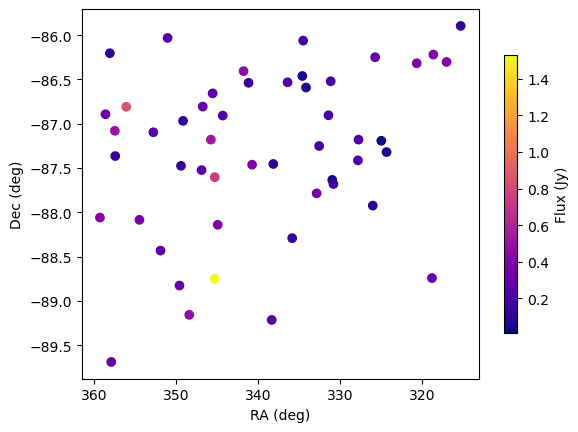

In [4]:
  >>> import os
  >>> import numpy as np
  >>> import matplotlib.pyplot as plt # doctest: +SKIP
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> from astropy import units
  >>> from astropy.coordinates import (
  ...     SkyCoord,
  ...     EarthLocation,
  ...     Angle,
  ...     AltAz,
  ...     Longitude,
  ...     Latitude,
  ...     Galactic)
  >>> sm = SkyModel()

  >>> filename = os.path.join(DATA_PATH, "gleam_50srcs.vot")
  >>> sm.read_gleam_catalog(filename)

  >>> _ = plt.scatter(x=sm.ra, y=sm.dec, c=sm.stokes[0,13,:], cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75)
  >>> _ = plt.xlim(max(sm.ra.value), min(sm.ra.value))
  >>> plt.autoscale()
  >>> _ = plt.xlabel("RA (deg)")
  >>> _ = plt.ylabel("Dec (deg)")
  >>> plt.show() # doctest: +SKIP


In [12]:
print(sm.freq_array[13].to("MHz"))

181.0 MHz


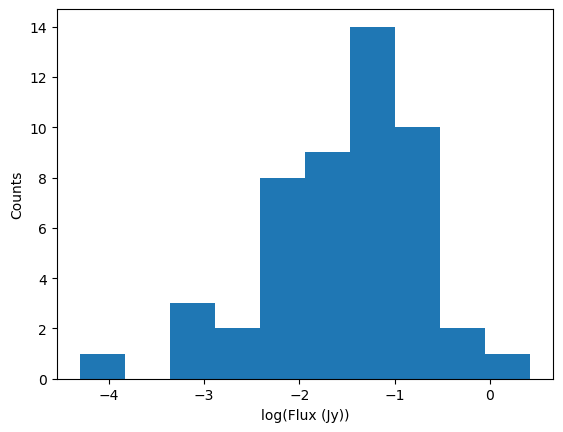

In [5]:
  >>> _ = plt.hist(np.log(sm.stokes.value[0,13,:]), bins=10) # doctest: +SKIP
  >>> _ = plt.xlabel("log(Flux (Jy))") # doctest: +SKIP
  >>> _ = plt.ylabel("Counts") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP



[7.60e+07 8.40e+07 9.20e+07 9.90e+07 1.07e+08 1.15e+08 1.22e+08 1.30e+08
 1.43e+08 1.51e+08 1.58e+08 1.66e+08 1.74e+08 1.81e+08 1.89e+08 1.97e+08
 2.04e+08 2.12e+08 2.20e+08 2.27e+08] Hz


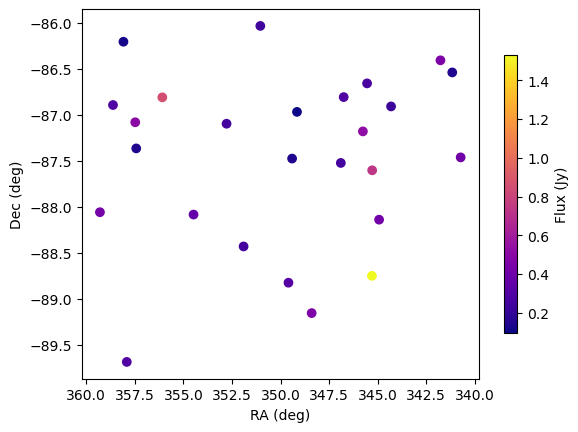

In [8]:

  >>> print(sm.freq_array)
  # [7.60e+07 8.40e+07 9.20e+07 9.90e+07 1.07e+08 1.15e+08 1.22e+08 1.30e+08
  #  1.43e+08 1.51e+08 1.58e+08 1.66e+08 1.74e+08 1.81e+08 1.89e+08 1.97e+08
  #  2.04e+08 2.12e+08 2.20e+08 2.27e+08] Hz

  >>> # Now make a copy and select only the sources with 340 < RA < 360
  >>> sm2 = sm.copy()
  >>> sm2.select(lon_range = Longitude([340, 360], units.deg))
  >>> _ = plt.scatter(x=sm2.ra, y=sm2.dec, c=sm2.stokes[0,13,:], cmap="plasma")
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75)
  >>> _ = plt.xlim(max(sm.ra.value), min(sm.ra.value))
  >>> plt.autoscale()
  >>> _ = plt.xlabel("RA (deg)")
  >>> _ = plt.ylabel("Dec (deg)")
  >>> plt.show() # doctest: +SKIP


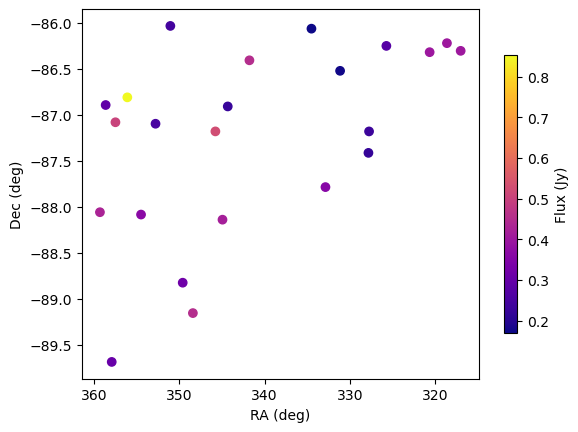

In [9]:

  >>> # Now make a copy and select only the sources 0.1 Jy < flux < 1 Jy
  >>> # where the fluxes are between 100-200 MHz
  >>> sm3 = sm.copy()
  >>> sm3.select(
  ...    min_brightness=.1*units.Jy, max_brightness=1*units.Jy, brightness_freq_range=[100, 200]*units.MHz
  ... )
  >>> _ = plt.scatter(x=sm3.ra, y=sm3.dec, c=sm3.stokes[0,13,:], cmap="plasma") # doctest: +SKIP
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75) # doctest: +SKIP
  >>> _ = plt.xlim(max(sm.ra.value), min(sm.ra.value)) # doctest: +SKIP
  >>> plt.autoscale() # doctest: +SKIP
  >>> _ = plt.xlabel("RA (deg)") # doctest: +SKIP
  >>> _ = plt.ylabel("Dec (deg)") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP


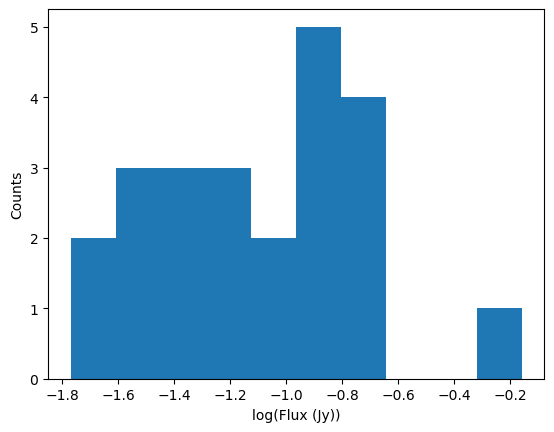

In [13]:

  >>> _ = plt.hist(np.log(sm3.stokes.value[0,13,:]), bins=10) # doctest: +SKIP
  >>> _ = plt.xlabel("log(Flux (Jy))") # doctest: +SKIP
  >>> _ = plt.ylabel("Counts") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP


In [16]:

  >>> print(sm.Ncomponents)
  # 50
  >>> print(sm3.Ncomponents)
  # 9

50
23
